In [1]:
# Utils
import sys
import os
import shutil
import time
import pickle
import numpy as np
import pandas as pd
import time
import random

# Deep Learning Librairies
import tensorflow as tf
import tensorflow.keras.preprocessing.image as kpi
import tensorflow.keras.layers as kl
import tensorflow.keras.optimizers as ko
import tensorflow.keras.backend as k
import tensorflow.keras.models as km
import tensorflow.keras.applications as ka

# Data visualization
import matplotlib.pyplot as plt

2022-10-19 10:22:51.850626: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4402007008266776702
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10326528512
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14627527498097677364
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:65:00.0, compute capability: 6.1"
]


2022-10-19 10:23:16.890121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 10:23:16.931080: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-19 10:23:16.947189: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-19 10:23:17.033876: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.90GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-19 10:23:17.034021: I tensorflow/stream_executor/platform/default/dso_loader.cc:4

In [3]:
N_train = 350 
N_val = 87 

In [99]:
epochs = 10
batch_size=5

In [5]:
img_width = 512
img_height = 512

In [100]:
train_label_df = pd.read_csv('./data/df_train.csv', header=None, names=['image_id', 'wealth_id'])

train_datagen = kpi.ImageDataGenerator()

train_label_df.drop(index=train_label_df.index[0], 
        axis=0, 
        inplace=True)
train_label_df['image_id'] = train_label_df['image_id'].astype(str)+['.png']
train_label_df = train_label_df.astype({'image_id':str, 'wealth_id':float})
#reduced the batch_size
train_generator = train_datagen.flow_from_dataframe(
        dataframe = train_label_df,
        directory = "./data/images/train/",  # this is the target directory
        x_col = 'image_id',
        y_col = 'wealth_id',
        validate_filenames=True,
        target_size=(img_width, img_height),  
        batch_size=batch_size,
        class_mode='other') 

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/ipykernel_l

Found 350 validated image filenames.


In [7]:
type(train_label_df['image_id'])

pandas.core.series.Series

In [101]:
val_label_df = pd.read_csv('./data/df_validation.csv', header=None, names=['image_id', 'wealth_id'])

val_datagen = kpi.ImageDataGenerator()

val_label_df.drop(index=val_label_df.index[0], 
        axis=0, 
        inplace=True)
val_label_df['image_id'] = val_label_df['image_id'].astype(str)+['.png']
val_label_df = val_label_df.astype({'image_id':str, 'wealth_id':float})

val_generator = val_datagen.flow_from_dataframe(
        dataframe = val_label_df,
        directory = "./data/images/validation/",  # this is the target directory
        x_col = 'image_id',
        y_col = 'wealth_id',
        validate_filenames=True,
        target_size=(img_width, img_height),  
        batch_size=batch_size,
        class_mode='other') 

Found 87 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/ipykernel_l

In [9]:
model_conv = km.Sequential()
model_conv.add(kl.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), data_format="channels_last"))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv.add(kl.Conv2D(32, (3, 3)))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv.add(kl.Conv2D(64, (3, 3)))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv.add(kl.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model_conv.add(kl.Dense(64))
model_conv.add(kl.Activation('relu'))
model_conv.add(kl.Dropout(0.5))
model_conv.add(kl.Dense(1))

model_conv.summary()

2022-10-19 10:23:31.665308: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-19 10:23:31.666800: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.90GiB deviceMemoryBandwidth: 451.17GiB/s
2022-10-19 10:23:31.666918: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-10-19 10:23:31.666967: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-10-19 10:23:31.666997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-10-19 10:23:31.667025: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuff

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      1

In [10]:
model_conv.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics='mse')

In [11]:
train_generator.batch_size

50

In [12]:
ts = time.time()
model_conv.fit_generator(train_generator, steps_per_epoch=N_train // batch_size, epochs=epochs, 
                         validation_data=val_generator,validation_steps=N_val // batch_size)
te = time.time()
t_learning_conv_simple_model = te-ts
print("Learning Time for %d epochs : %d seconds"%(epochs,t_learning_conv_simple_model))


/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-10-19 10:23:36.863713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-10-19 10:23:36.922471: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3199980000 Hz


Epoch 1/10


2022-10-19 10:23:38.195544: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-10-19 10:23:38.993997: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-10-19 10:23:42.124696: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


7/7 [==============================] - 37s 5s/step - loss: 935852.8430 - mse: 935852.8508 - val_loss: 7377.0674 - val_mse: 7377.0674
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 5321.3282 - mse: 5321.3282 - val_loss: 0.9801 - val_mse: 0.9801
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 3.2858 - mse: 3.2858 - val_loss: 0.7429 - val_mse: 0.7429
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 2.7556 - mse: 2.7556 - val_loss: 1.1531 - val_mse: 1.1531
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 2.1509 - mse: 2.1509 - val_loss: 0.9658 - val_mse: 0.9658
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 1.8728 - mse: 1.8728 - val_loss: 1.2807 - val_mse: 1.2807
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 1.8575 - mse: 1.8575 - val_loss: 0.9694 - val_mse: 0.9694
Epoch 8/10
7/7 [==============================] - 9s 1s/step - loss: 1.7950 - mse: 1.7950 - val_los

In [13]:
# Analysing
# 
for layer in model_conv.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)


In [14]:
filters, biases = model_conv.layers[0].get_weights()
filters.shape

(3, 3, 3, 32)

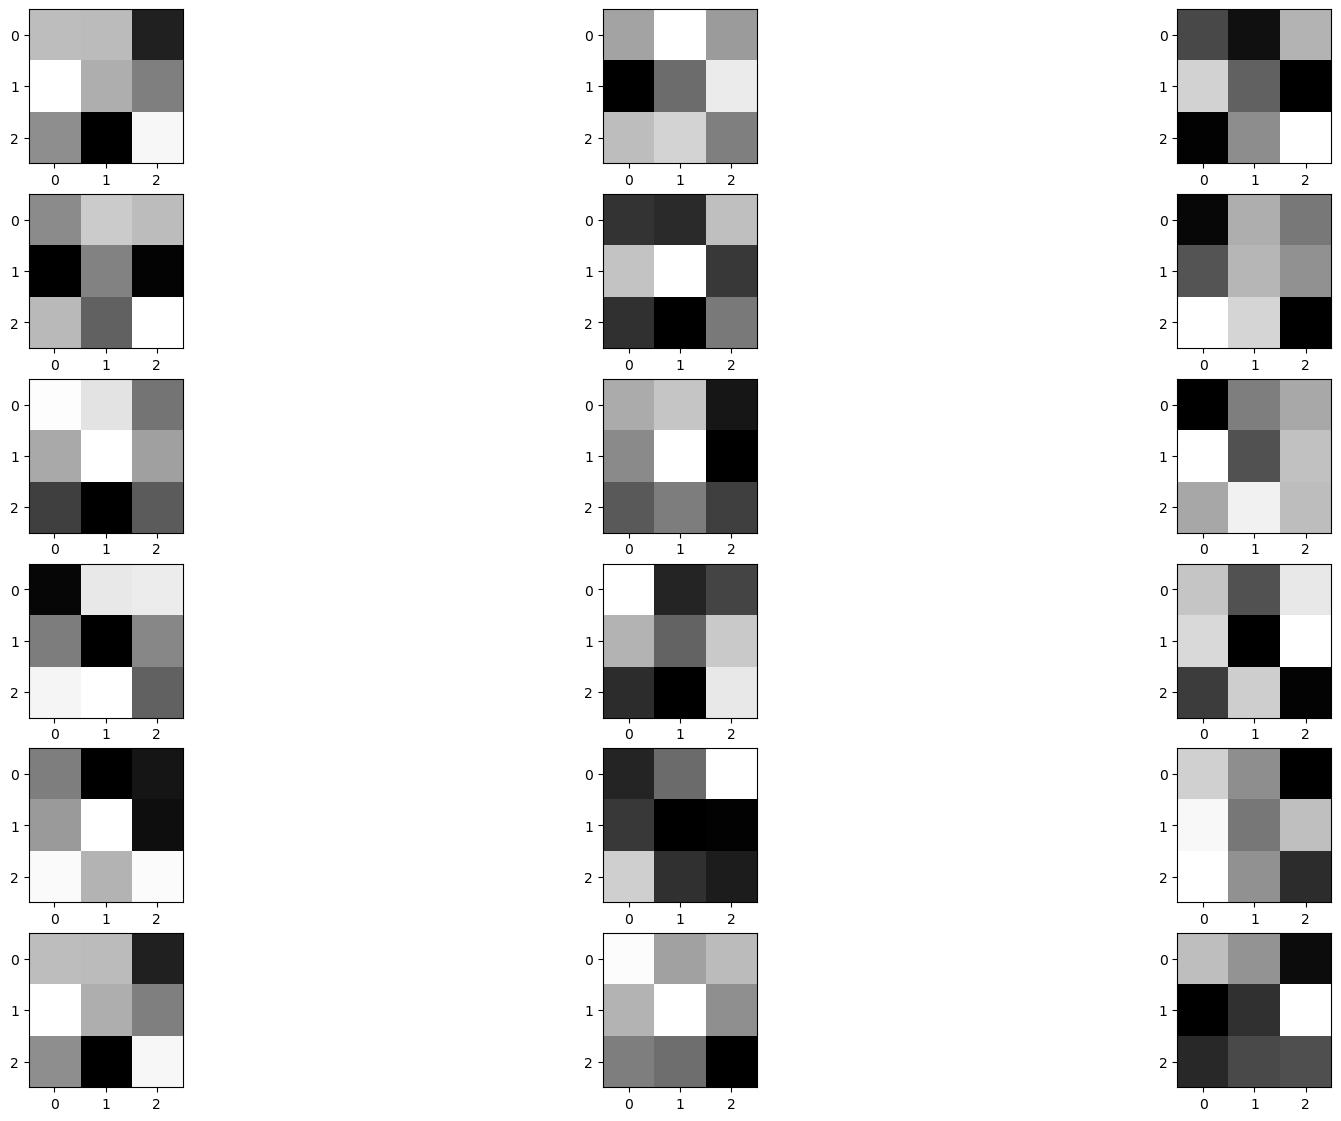

In [15]:
n_filters = 6
fig, ax = plt.subplots(n_filters, 3, figsize=(21,14))
row = 0
col = 0
for i in range(n_filters):
    f = filters[:, :, :, i]
    ax[row, col].imshow(f[:, :, col], cmap= 'gray')
    for j in range(3):
        ax[i, j].imshow(f[:, :, j], cmap= 'gray')

In [16]:
for i in range(len(model_conv.layers)):
    layer = model_conv.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 510, 510, 32)
3 conv2d_1 (None, 253, 253, 32)
6 conv2d_2 (None, 124, 124, 64)


In [17]:
#refine the model to ouput the result of applying convolutions
model_featmap = tf.keras.Model(inputs=model_conv.inputs, outputs=model_conv.layers[0].output)
#loading an image of the targeted size
img = kpi.load_img('data/images/'+'train/1812.png', target_size=(512, 512))  # this is a PIL image
img
img = kpi.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)

In [18]:
features_map = model_featmap.predict(img)
features_map.shape
features_map = features_map[0]
features_map.shape

(510, 510, 32)

25
23
1
22
10
10
5
12
14
4
26
5
12
30
4
25


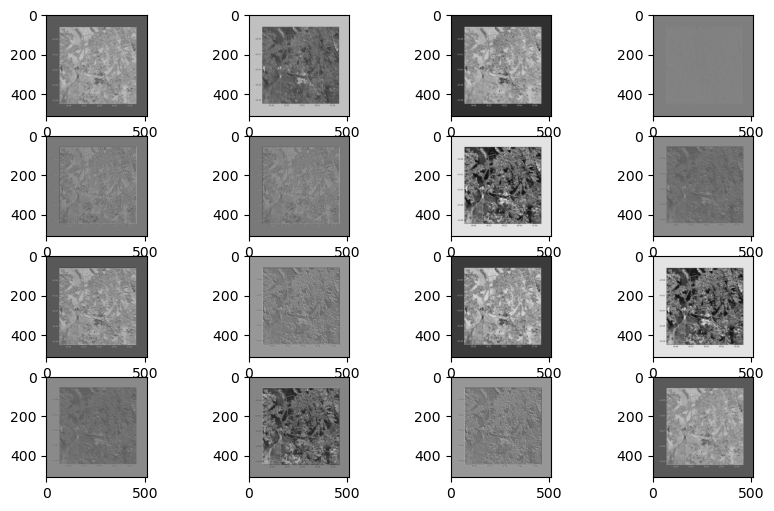

In [19]:
#the layer in question applies 32 filters, we expect therefore to obtain 32 images
fig, ax = plt.subplots(4, 4, figsize=(10,6))
for i in range(4):
    for j in range(4):
        filter_id = random.choice(np.arange(32))
        print(filter_id)
        ax[i,j].imshow(features_map[:,:,filter_id], cmap='gray')


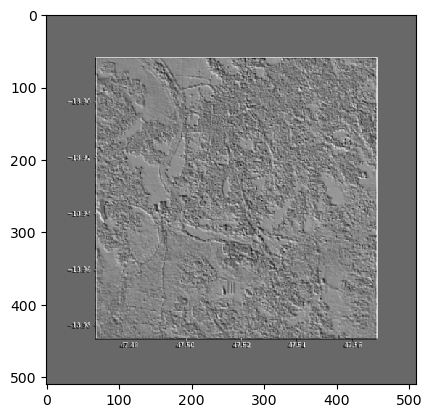

In [31]:
plt.imshow(features_map[:,:,4], cmap='binary', interpolation='nearest')

30
31
27


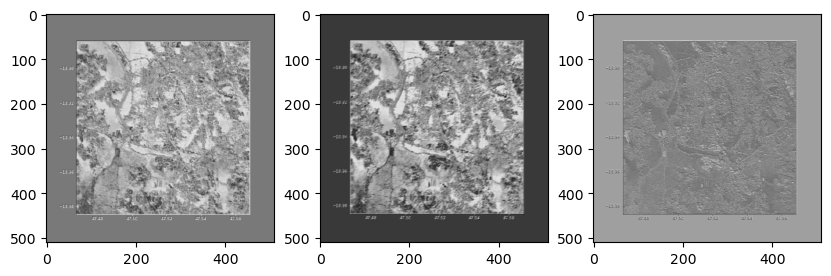

In [27]:
#random feature map
fig, ax = plt.subplots(1, 3, figsize=(10,10))
for i in range(3):
    filter_id = random.choice(np.arange(32))
    print(filter_id)
    ax[i].imshow(features_map[:,:,filter_id], cmap='binary')


**Model with more convolutional layers**

In [32]:
model_conv_1 = km.Sequential()
model_conv_1.add(kl.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), data_format="channels_last"))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv_1.add(kl.Conv2D(32, (3, 3)))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv_1.add(kl.Conv2D(32, (3, 3)))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv_1.add(kl.Conv2D(32, (3, 3)))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv_1.add(kl.Conv2D(32, (3, 3)))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv_1.add(kl.Conv2D(32, (3, 3)))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv_1.add(kl.Conv2D(64, (3, 3)))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.MaxPooling2D(pool_size=(2, 2)))

model_conv_1.add(kl.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model_conv_1.add(kl.Dense(64))
model_conv_1.add(kl.Activation('relu'))
model_conv_1.add(kl.Dropout(0.5))
model_conv_1.add(kl.Dense(1))

model_conv_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
activation_5 (Activation)    (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 32)     

In [33]:
model_conv_1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics='mse')

In [34]:
ts = time.time()
model_conv_1.fit_generator(train_generator, steps_per_epoch=N_train // batch_size, epochs=epochs, 
                         validation_data=val_generator,validation_steps=N_val // batch_size)
te = time.time()
t_learning_conv_simple_model = te-ts
print("Learning Time for %d epochs : %d seconds"%(epochs,t_learning_conv_simple_model))


Epoch 1/10
7/7 [==============================] - 11s 2s/step - loss: 267.5561 - mse: 267.5561 - val_loss: 1.6398 - val_mse: 1.6398
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 2.6512 - mse: 2.6512 - val_loss: 1.3846 - val_mse: 1.3846
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 2.1569 - mse: 2.1569 - val_loss: 1.2052 - val_mse: 1.2052
Epoch 4/10
7/7 [==============================] - 14s 2s/step - loss: 1.9476 - mse: 1.9476 - val_loss: 1.1917 - val_mse: 1.1917
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 1.7412 - mse: 1.7412 - val_loss: 1.5289 - val_mse: 1.5289
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 2.1009 - mse: 2.1009 - val_loss: 1.4224 - val_mse: 1.4224
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 1.7753 - mse: 1.7753 - val_loss: 1.2393 - val_mse: 1.2393
Epoch 8/10
7/7 [==============================] - 9s 1s/step - loss: 1.5769 - mse: 1.5769 - val_loss: 2.0

In [35]:
for i in range(len(model_conv_1.layers)):
    layer = model_conv_1.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d_3 (None, 510, 510, 32)
3 conv2d_4 (None, 253, 253, 32)
6 conv2d_5 (None, 124, 124, 32)
9 conv2d_6 (None, 60, 60, 32)
12 conv2d_7 (None, 28, 28, 32)
15 conv2d_8 (None, 12, 12, 32)
18 conv2d_9 (None, 4, 4, 64)


In [42]:
model_featmap = tf.keras.Model(inputs=model_conv_1.inputs, outputs=model_conv_1.layers[0].output)
n_filters = model_conv_1.layers[0].output.shape[-1]
print(n_filters)
#loading an image of the targeted size
img = kpi.load_img('data/images/'+'train/1812.png', target_size=(512, 512))  # this is a PIL image

img = kpi.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
features_map = model_featmap.predict(img)
features_map = features_map[0]
features_map.shape

32


(510, 510, 32)

9
20
11


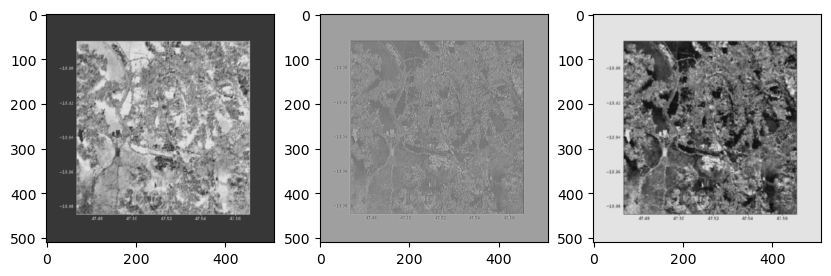

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(10,10))
for i in range(3):
    filter_id = random.choice(np.arange(32))
    print(filter_id)
    ax[i].imshow(features_map[:,:,filter_id], cmap='binary')


**VGG16**

In [49]:
model_VGG16_without_top = ka.VGG16(include_top=False, weights = 'imagenet')
model_VGG16_without_top.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [56]:
model_VGG16_without_top.output.shape

TensorShape([None, None, None, 512])

In [84]:
features_train = model_VGG16_without_top.predict_generator(train_generator, N_train / batch_size,  verbose = 1)

/usr/local/insa/anaconda/envs/IA-GPU/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
2022-10-19 12:07:14.478056: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-10-19 12:07:14.478109: W tensorflow/core/kernels/gpu_utils.cc:49] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


7/7 [==============================] - 25s 986ms/step


In [89]:
features_train.shape

(350, 16, 16, 512)

In [94]:
#adding our regressor on top of the vgg16 conv layers

input_shape = model_VGG16_without_top.output.shape
print(input_shape)

regressor = km.Sequential()
regressor.add(kl.Flatten(input_shape=features_train.shape[1:]))
regressor.add(kl.Dense(64, activation='relu'))
regressor.add(kl.Dropout(0.5))
regressor.add(kl.Dense(1))

regressor.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics='mse')

regressor.summary()

(None, None, None, 512)
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                8388672   
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 65        
Total params: 8,388,737
Trainable params: 8,388,737
Non-trainable params: 0
_________________________________________________________________


In [97]:
model_complete = km.Model(inputs= model_VGG16_without_top.inputs, outputs = regressor(model_VGG16_without_top.outputs))
model_complete.compile(loss='mean_squared_error', optimizer='adam', metrics='mse')
model_complete.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0  

In [102]:
ts = time.time()
model_complete.fit_generator(train_generator, steps_per_epoch=N_train // batch_size, epochs=epochs, 
                         validation_data=val_generator,validation_steps=N_val // batch_size)
te = time.time()
t_learning_conv_simple_model = te-ts
print("Learning Time for %d epochs : %d seconds"%(epochs,t_learning_conv_simple_model))


Epoch 1/10
70/70 [==============================] - 19s 226ms/step - loss: 13376.8789 - mse: 13376.8789 - val_loss: 1.1441 - val_mse: 1.1441
Epoch 2/10
70/70 [==============================] - 16s 224ms/step - loss: 1.9331 - mse: 1.9331 - val_loss: 1.1082 - val_mse: 1.1082
Epoch 3/10
70/70 [==============================] - 16s 222ms/step - loss: 1.9332 - mse: 1.9332 - val_loss: 1.0380 - val_mse: 1.0380
Epoch 4/10
70/70 [==============================] - 16s 222ms/step - loss: 1.9332 - mse: 1.9332 - val_loss: 1.1455 - val_mse: 1.1455
Epoch 5/10
70/70 [==============================] - 16s 223ms/step - loss: 1.9332 - mse: 1.9332 - val_loss: 1.1270 - val_mse: 1.1270
Epoch 6/10
70/70 [==============================] - 16s 226ms/step - loss: 1.9332 - mse: 1.9332 - val_loss: 1.1437 - val_mse: 1.1437
Epoch 7/10
70/70 [==============================] - 16s 225ms/step - loss: 1.9331 - mse: 1.9331 - val_loss: 1.1418 - val_mse: 1.1418
Epoch 8/10
70/70 [==============================] - 16s 224ms